# Time series data Analysis Stock Price

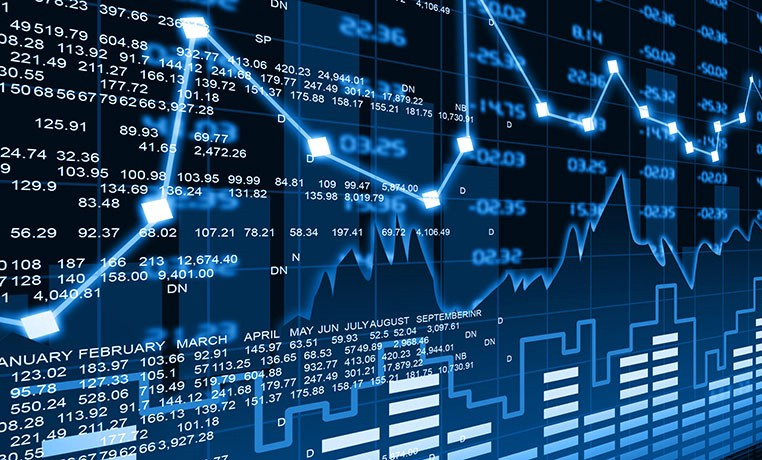

Here I will be covering how to work with stock prices? We will be considering the stock prices of four companies HBL,UBL,MCB and BOP.We will be be covering various concepts like moving average,correlation,risk analysis etc.

#### This kernel is a work in process.If you like my work please do <font color="red"><b>VOTE</b></font>.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

**Import Python Modules **

In [ ]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
#from __future__ import division

In [ ]:
tech_list = ['HBL', 'UBL', 'BOP', 'MCB']

**Importing the Stock Prices**

In [ ]:
HBL=pd.read_csv('../input/ksedataset/HBL.csv')
UBL=pd.read_csv('../input/ksedataset/UBL.csv')
BOP=pd.read_csv('../input/ksedataset/BOP.csv')
MCB=pd.read_csv('../input/ksedataset/MCB.csv')

In [ ]:
HBL.head()

In [ ]:
HBL.index

In [ ]:
#AAPL.index=pd.to_datetime(AAPL.index)
#AAPL.index

In [ ]:
company_list = [HBL, UBL, BOP, MCB]
company_name = ["HBL", "UBL", "BOP", "MCB"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

In [ ]:
HBL.describe().T

We will be using the Adjusted close price to do historic price analysis of the stock

In [ ]:
HBL.info()

**Display Historical Stock Price**

Let's go ahead and play aorund with the HBL DataFrame to get a feel for the data

In [ ]:
HBL['Date']=pd.to_datetime(HBL['Date'])
UBL['Date']=pd.to_datetime(HBL['Date'])
BOP['Date']=pd.to_datetime(HBL['Date'])
MCB['Date']=pd.to_datetime(HBL['Date'])
HBL.info()

We can see that the data column values have changed to datetime64 type

****Closing Price of Stock**

In [ ]:
HBL.plot(x='Date', y='Close',legend=True,figsize=(10,4))
plt.title('HBL')
plt.ioff()

UBL.plot(x='Date', y='Close',legend=True,figsize=(10,4))
plt.title('UBL')
plt.ioff()

BOP.plot(x='Date', y='Close',legend=True,figsize=(10,4))
plt.title('BOP')
plt.ioff()

MCB.plot(x='Date', y='Close',legend=True,figsize=(10,4))
plt.title('MCB')
plt.ioff()

We have stock Price starting from 2008 to 2018 

**Volume tradeding for Stock**

In [ ]:
title='VOLUME TRADED'
ylabel='Volume'
xlabel='Time'

In [ ]:
ax=HBL.plot(x='Date', y='Volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.title('HBL')
plt.ioff()

ax=UBL.plot(x='Date', y='Volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.title('UBL')
plt.ioff()

ax=BOP.plot(x='Date', y='Volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.title('BOP')
plt.ioff()

ax=MCB.plot(x='Date', y='Volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.title('MCB')
plt.ioff()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

### **Plotting between Specified time**

In [ ]:
HBL.plot(x='Date', y='Close',ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.title('HBL')
plt.ioff()

UBL.plot(x='Date', y='Close',ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.title('UBL')
plt.ioff()

BOP.plot(x='Date', y='Close',ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.title('BOP')
plt.ioff()

MCB.plot(x='Date', y='Close',ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.title('MCB')
plt.ioff()

We have ploted the closing Price by specifying the range of dates xlim

# 2. What was the moving average of the various stocks?

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

In [ ]:
print(HBL.columns)

In [ ]:
df.groupby("company_name").hist(figsize=(12, 12));

### Moving Average for Stocks

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

HBL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('HBL')

UBL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('UBL')

BOP[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BOP')

MCB[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('MCB')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

### **Daily Returns**

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)           #Use ax.get_subplotspec().colspan.start instead.
fig.set_figheight(8)
fig.set_figwidth(15)

HBL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('HBL')

UBL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('UBL')

BOP['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BOP')

MCB['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('MCB')

fig.tight_layout()

##### Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

## Average Daily return

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Average Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [ ]:
# Note the use of hist() 
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=100)
    plt.ylabel('Average Daily Return')
    plt.title(f'{company_name[i - 1]}')

# 4. What was the correlation between different stocks closing prices?

## **Checking if the Stock prices of tech companies are correlated**

In [ ]:
df=HBL['Date'].copy()
df=pd.DataFrame(df)
df['HBL']=HBL['Close']
df['UBL']=UBL['Close']
df['BOP']=BOP['Close']
df['MCB']=MCB['Close']
df.drop(['Date'], axis = 1, inplace = True, errors = 'ignore')

In [ ]:
tech_rets=df.pct_change()
tech_rets=pd.DataFrame(tech_rets)
tech_rets['Date']=HBL['Date']
tech_rets.shape

In [ ]:
import scipy.stats as stats
sns.jointplot('UBL','UBL',tech_rets,kind='scatter',color='seagreen').annotate(stats.pearsonr)
plt.ioff()

We just compared the daily percentage change of UBL with itself.So the correlation is 1 as expected

**Compare MCB & HBL**

In [ ]:
sns.jointplot('MCB','HBL',tech_rets,kind='scatter',color='seagreen').annotate(stats.pearsonr)
plt.ioff()

We can see that p =0.72

**Pair Plot**

In [ ]:
sns.pairplot(tech_rets, kind='reg')
#sns.pairplot(tech_rets.dropna())
#plt.ioff()

We can see that BOP and UBL have good correlation on daily returns

## **Customised Pair Grid for Daily Return**

In [ ]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.ioff()

**Customized Pair Grid for Close price **

In [ ]:
returns_fig=sns.PairGrid(df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.ioff()

### **Correlation plot for daily returns**

**Heatmap Daily Return**

In [ ]:
sns.heatmap(tech_rets.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

**Heatmap Closing Price**

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

Some companies have Positive Correlations and Some Negtive

# 5. How much value do we put at risk by investing in a particular stock?

## **Risk Analysis**

In [ ]:
rets=tech_rets.dropna()

In [ ]:
area=np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))

Tock with Low risk and high return are the best stock to buy

## **Value at Risk**

In [ ]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=2000, color='purple')
    plt.ylabel('AVG Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
    
#sns.distplot(HBL['Daily Return'].dropna(),bins=2000,color='purple')
#plt.ioff()

In [ ]:
rets.head()

In [ ]:
rets['HBL'].quantile(0.05)

-0.030 means that 95% of the times the worst daily Loss will not exceed 2.28%

## **Value at risk using Monte Carlo Method**

In [ ]:
#days=365
#dt=1/365
#mu=rets.mean()['GOOG']
#sigma=rets.std()['GOOG']

days=365
dt=1/365
mu=rets.mean()['UBL']
sigma=rets.std()['UBL']

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [ ]:
UBL.head()

In [ ]:
start_price=568
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For UBL')
plt.ioff()

In [ ]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [ ]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for UBL Stock after %s days" % days, weight='bold');

We can see from out simulation that the start price of the stock is 568 $ and the mean Final Price is very close at  568.63.This means that UBL Bank stock price is quite stable and doesnt fluctuate more. VaR(0.99) = 28.00 means that the maximm risk for insvestment in this stock is  28.00 which is small amount compared to the investement.

**Forecasting HBL Stock Price **

In [ ]:
HBL.head()

In [ ]:
df_prophet=HBL[['Date','Close']]
df_prophet=df_prophet.sort_values('Date')
df_prophet

**Renaiming the Column names to Suite Prophet Algorithm**

In [ ]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Close':'y'})
df_prophet

**Creating the Prophet Model**

In [ ]:
import random 
import seaborn as sns
from fbprophet import Prophet
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

**Plotting the HBL Stock Forecast for Period of One years**

In [ ]:
figure=m.plot(forecast,xlabel='Date',ylabel='Closing Price')

So the model predicts that the HBL Bank stock Price would decrease from Mar 2018 to Mar 2019.

**Plotting component of the Forecast**

In [ ]:
figure=m.plot_components(forecast)

1.Historical Trend Show that the Price of HBL Bank has been decreasing .Investors can lose money on it

2.Weekly trend shows that the Stock price decrease is lowest on Tuesday then reduces as week proceeds.Please do note that Saturday and Sunday are off for the Stock Exchange.

3.The annual trend shows the seasoniality of the stock.It can be figured out the stock price peaks in month of Mar.